In [1]:
import pandas as pd

dados = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/dd7ba8142321c2c8aaa0ddd6c8862fcc/raw/e694a9b43bae4d52b6c990a5654a193c3f870750/precos.csv")
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1


In [2]:
dados["km_por_ano"] = dados["milhas_por_ano"] * 1.60934
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido,km_por_ano
0,21801,2000,30941.02,1,35085.22134
1,7843,1998,40557.96,1,12622.05362
2,7109,2006,89627.50,0,11440.79806
3,26823,2015,95276.14,0,43167.32682
4,7935,2014,117384.68,1,12770.11290


In [3]:
from datetime import datetime

dados["idade"] = datetime.today().year -dados["ano_do_modelo"]
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido,km_por_ano,idade
0,21801,2000,30941.02,1,35085.22134,24
1,7843,1998,40557.96,1,12622.05362,26
2,7109,2006,89627.50,0,11440.79806,18
3,26823,2015,95276.14,0,43167.32682,9
4,7935,2014,117384.68,1,12770.11290,10


In [4]:
dados.drop(["milhas_por_ano", "ano_do_modelo"], axis=1 , inplace=True)
dados.head()

,preco,vendido,km_por_ano,idade
0,30941.02,1,35085.22134,24
1,40557.96,1,12622.05362,26
2,89627.50,0,11440.79806,18
3,95276.14,0,43167.32682,9
4,117384.68,1,12770.11290,10


In [5]:
x = dados [["preco", "idade", "km_por_ano"]]
y = dados["vendido"]

In [6]:
len(dados.query ("vendido == True"))/len(dados)

0.58

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

#Dummy Classifier

SEED = 20

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,y, random_state = SEED , stratify=y)

print(f"Treinaremos com {len(raw_treino_x)} elementos e testaremos com {len(raw_teste_x)} elementos")



classificador = DummyClassifier()
classificador.fit(raw_treino_x, treino_y)
previsoes = classificador.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia do dummy classifier foi de {acuracia:.2f}%")

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia do dummy classifier foi de 58.00%


In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

#Dummy Classifier

SEED = 20

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,y, random_state = SEED , stratify=y)

print(f"Treinaremos com {len(raw_treino_x)} elementos e testaremos com {len(raw_teste_x)} elementos")



classificador = DummyClassifier(strategy="stratified")
classificador.fit(raw_treino_x, treino_y)
previsoes = classificador.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia do dummy classifier foi de {acuracia:.2f}%")

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia do dummy classifier foi de 51.56%


In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, random_state = SEED , stratify=y)

print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos")

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi de 58.00%


In [10]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, random_state = SEED , stratify=y)

print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos")

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 7500 elementos e testaremos com 2500 elementos


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


A acurácia foi de 54.36%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, random_state = SEED , stratify=y)

print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos")

#scaler = StandardScaler()
#scaler.fit(treino_x)

#treino_x = scaler.transform(raw_treino_x)
#teste_x = scaler.transform(raw_teste_x)

modelo = DecisionTreeClassifier(max_depth =3)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi de 78.40%


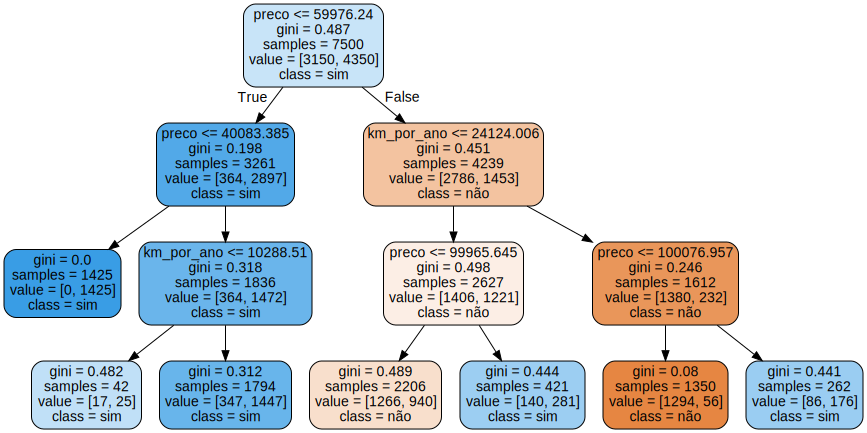

In [23]:
from sklearn.tree import export_graphviz
import graphviz

estrutura = export_graphviz(modelo, filled=True, rounded=True, feature_names=x.columns, class_names=["não","sim"])
grafico = graphviz.Source(estrutura)
grafico
